In [2]:
# note: we do not need to involve this MNISTDataset thingy anymore =)
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [15]:
# we can create a "dummy" dataset with range just to see how it works

data = tf.data.Dataset.range(10)
# uncomment any of the below (also multiple ones if you want) and run this cell each time. 
# make sure you understand what each transformation does!

data = data.shuffle(20)  # 10 is the buffer size -- play with this!!
data = data.batch(2)  # 2 is batch size -- change it!
# data = data.repeat(5)  # number of repetitions


elems = 0
for thing in data:
    # elems += 1
    print(thing.numpy())
print("\nTotal number of elements: {}".format(elems))

[3 6]
[8 5]
[9 1]
[2 7]
[4 0]

Total number of elements: 0


5


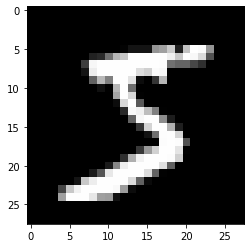

In [ ]:
# basic MNIST

# same thing we had earlier -- this just loads the numpy arrays
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# this is now different
train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))

# we can iterate through the data and check what it looks like
for img, lbl in train_data:
    print(lbl.numpy())
    plt.imshow(img.numpy(), cmap="Greys_r")
    plt.show()
    input()

In [ ]:
# things we really gotta do:
# - normalize the images to [0, 1] (first convert to float)
# - reshape images from (28, 28) to (784,) (although we could do this later!)
# - convert labels to int32 (otherwise tensorflow is gonna be sad :( )

train_images = (train_images.astype(np.float32) / 255.).reshape((-1, 784))
test_images = (test_images.astype(np.float32) / 255.).reshape((-1, 784))

train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.batch(128)

# just print the shapes to get an idea of what we have here (note the additional batch axis)
# also note the size of the very last batch!
for img_batch, lbl_batch in train_data:
    print(img_batch.shape, lbl_batch.shape)
    
    
# in principle this is it, and you can use these batches as input to your model!
# BUT: you should shuffle your data and maybe repeat as well (see assignment)!